In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

In [4]:
boston = load_boston()

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [5]:
X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'], random_state=0)

In [6]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df.info(), boston_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


(None,
 CRIM       504
 ZN          26
 INDUS       76
 CHAS         2
 NOX         81
 RM         446
 AGE        356
 DIS        412
 RAD          9
 TAX         66
 PTRATIO     46
 B          357
 LSTAT      455
 dtype: int64)

In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
boston_df['ZN'].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [9]:
boston_df.isna().sum().sum()

0

In [10]:
reg_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
boston_df_total = (boston_df
.assign(PRICE=boston['target'])
)

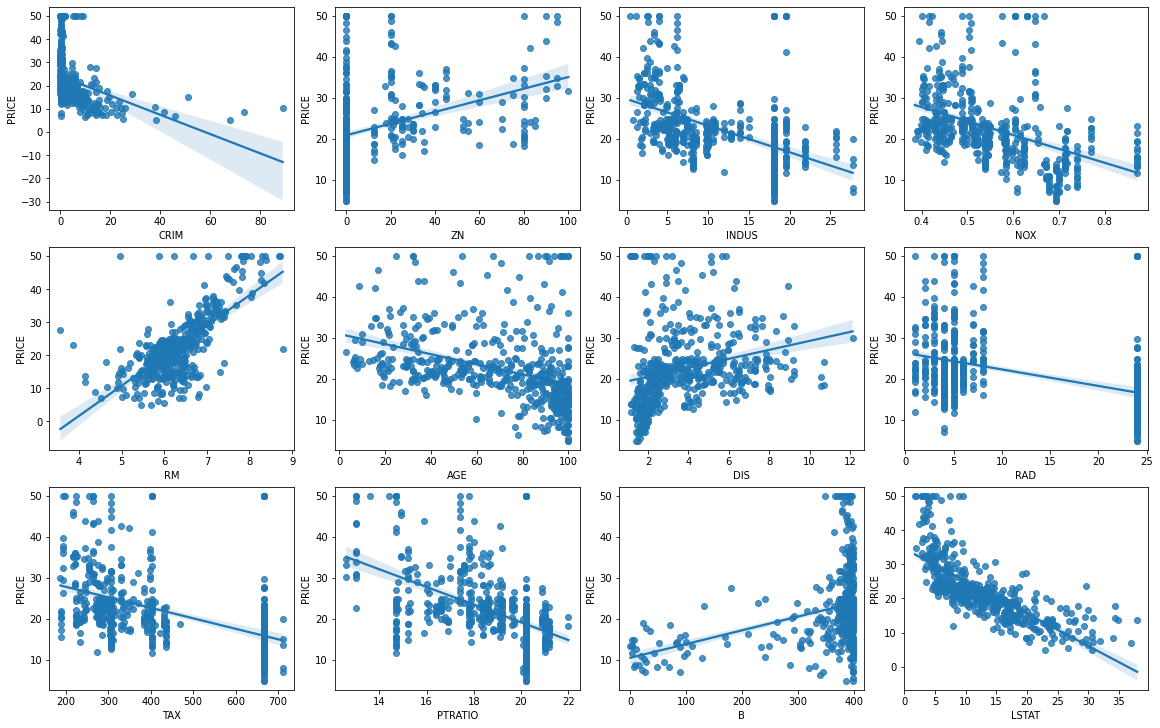

In [11]:
fig, axs = plt.subplots(3, 4, figsize=(16, 10), constrained_layout=True)
for reg_feat, ax in zip(reg_features, axs.ravel()):
    sns.regplot(data=boston_df_total, x=reg_feat, y='PRICE', ax=ax)

In [12]:
y_train.mean(), y_test.mean()

(22.608707124010557, 22.30629921259843)

In [13]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [14]:
linreg = LinearRegression().fit(X_train_sc, y_train)
y_pred = linreg.predict(X_test_sc)
linreg.score(X_test_sc, y_test)

0.635463843320213

In [15]:
ridge = Ridge(alpha=0.01, max_iter=1000).fit(X_train_sc, y_train)
ridge.score(X_test_sc, y_test)

0.6354550401807844

In [16]:
lasso = Lasso(alpha=0.01, max_iter=1000).fit(X_train_sc, y_train)
lasso.score(X_test_sc, y_test)

0.6343061000666705

In [17]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(Lasso(max_iter=1000), param_grid=param_grid, n_jobs=-1).fit(X_train_sc, y_train)
grid.best_score_, grid.best_params_, grid.score(X_test_sc, y_test)

(0.7224649678695162, {'alpha': 0.01}, 0.6343061000666705)

In [18]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(Ridge(max_iter=1000), param_grid=param_grid, n_jobs=-1).fit(X_train_sc, y_train)
grid.best_score_, grid.best_params_, grid.score(X_test_sc, y_test)

(0.7236401292904292, {'alpha': 10}, 0.6272671927504454)

In [19]:
boston_df_test = (pd.DataFrame(X_test, columns=boston['feature_names'])
.assign(PRICE=y_test, PREDICT=y_pred)
)
boston_df_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICT
0,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6,24.952333
1,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,23.616997
2,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,23.0,29.205886
3,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,8.3,11.960705
4,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2,21.333620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.21977,0.0,6.91,0.0,0.448,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20,19.4,17.538048
123,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2,21.502223
124,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3,23.632813
125,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58,18.8,20.282598


In [24]:
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df2 = (iris_df
.assign(target=iris['target'])
)
iris_df2['target2'] = iris_df2['target'].replace(dict(zip(np.unique(iris['target']), iris['target_names'])))
iris_df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target2
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [25]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [26]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\admin\AppData\Local\Temp\ipykernel_20224\3943437343.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(iris_df, c=iris_df2['target'], ax=ax)


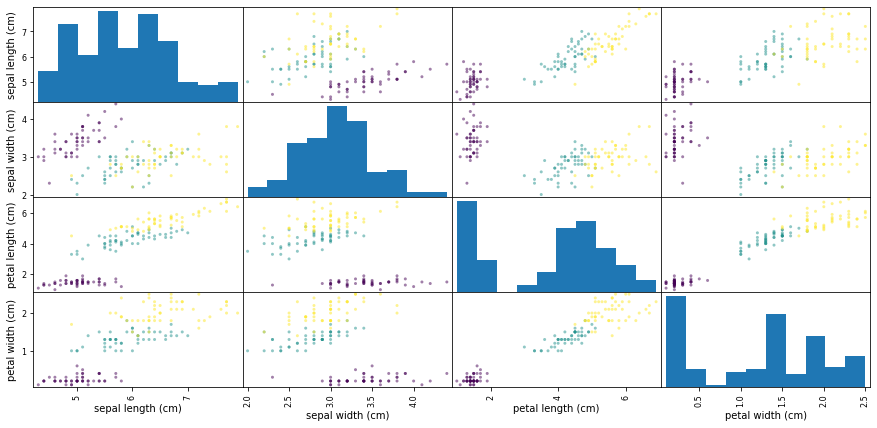

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
scatter_matrix(iris_df, c=iris_df2['target'], ax=ax)
plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], stratify=iris['target'], random_state=0)

In [40]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=4).fit(X_train, y_train)
rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(1.0, 1.0)

In [43]:
rfc.feature_importances_

array([0.12085444, 0.02937842, 0.44149303, 0.40827412])

In [47]:
rfc.predict(X_test), rfc.predict_proba(X_test).round(2)

(array([0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1,
        1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2]),
 array([[1.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  ],
        [0.  , 0.99, 0.01],
        [0.  , 0.96, 0.04],
        [0.  , 1.  , 0.  ],
        [1.  , 0.  , 0.  ],
        [0.03, 0.93, 0.04],
        [0.  , 0.46, 0.54],
        [0.  , 0.01, 0.99],
        [0.  , 0.25, 0.75],
        [0.  , 0.99, 0.01],
        [0.  , 0.02, 0.98],
        [0.  , 0.99, 0.01],
        [1.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  ],
        [0.  , 0.  , 1.  ],
        [1.  , 0.  , 0.  ],
        [0.  , 0.97, 0.03],
        [0.  , 0.17, 0.83],
        [0.  , 1.  , 0.  ],
        [0.  , 0.98, 0.02],
        [1.  , 0.  , 0.  ],
        [0.  , 0.44, 0.56],
        [0.98, 0.02, 0.  ],
        [1.  , 0.  , 0.  ],
        [0.  , 0.96, 0.04],
        [0.  , 0.11, 0.89],
        [0.  , 1.  , 0.  ],
        [1.  , 0.  , 0.  ],


In [54]:
(pd.DataFrame(X_test, columns=iris['feature_names'])
.assign(actual_target=y_test)
.assign(predict_target=rfc.predict(X_test))
.assign(prob=rfc.predict_proba(X_test).max(axis=1).round(2))
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual_target,predict_target,prob
0,5.1,3.4,1.5,0.2,0,0,1.00
1,4.8,3.0,1.4,0.1,0,0,1.00
2,5.3,3.7,1.5,0.2,0,0,1.00
3,5.1,3.3,1.7,0.5,0,0,1.00
4,5.5,2.4,3.7,1.0,1,1,0.99
5,5.7,2.8,4.5,1.3,1,1,0.96
6,5.7,2.8,4.1,1.3,1,1,1.00
7,4.9,3.1,1.5,0.1,0,0,1.00
8,6.0,3.4,4.5,1.6,1,1,0.93
9,7.2,3.0,5.8,1.6,2,2,0.54
